In [1]:
from pennylane import numpy as np
import pennylane as qml
from matplotlib import pyplot as plt

In [2]:
'''
Here we are gonna use Amplitude damping and Phase damping noise
'''

'\nHere we are gonna use Amplitude damping and Phase damping noise\n'

In [3]:
I = np.eye(2)
X = np.array([[0, 1], [1, 0]])
Z = np.array([[1, 0], [0, -1]])
Y = np.array([[0,-1j],[1j, 0]])

In [4]:
'''
T1 = single-qubit (energy) relaxation time and 
T2 = dephasing time
'''

'\nT1 = single-qubit (energy) relaxation time and \nT2 = dephasing time\n'

In [5]:
t=np.linspace(1,200,200)*10**(-9)#60*10**(-9)
T1=400*10**(-9)
T2=200*10**(-9)
steps=4

In [6]:
#P_AD=0
#P_PD=0
def P(t,T1,T2):
    
    P_AD=1-np.exp(-t/T1)
    P_PD=1-np.exp(-t*2/T2)*np.exp(t/T1)
    
    return P_AD,P_PD

In [7]:
def ED(t,T1,T2):
    P_AD,P_PD=P(t,T1,T2)
    gamma=P_AD
    Lambda=(1-P_AD)*P_PD
    
    ED1=((1+np.sqrt(1-gamma-Lambda))/2)*I+((1-np.sqrt(1-gamma-Lambda))/2)*Z
    ED2=np.sqrt(gamma)/2*X+1j*np.sqrt(gamma)/2*Y
    ED3=np.sqrt(Lambda)/2*I-np.sqrt(Lambda)/2*Z
    
    return ED1,ED2,ED3

In [8]:
a,b,c=ED(0.1,0.008,0.005)
c

tensor([[0.        , 0.        ],
        [0.        , 0.00193045]], requires_grad=True)

In [9]:
dev=qml.device("default.mixed",wires=3)

In [10]:
@qml.qnode(dev)
def density_matrix(step):
   
    if step==1:
        qml.Hadamard(wires=0)
        return qml.state()
    
    if step==2:
        qml.Hadamard(wires=0)
        qml.CNOT(wires=[0,1])
        return qml.state()
    
    if step==3:
        qml.Hadamard(wires=0)
        qml.CNOT(wires=[0,1])
        qml.CNOT(wires=[0,2])
        return qml.state()
    
    
    if step==4:
        qml.Hadamard(wires=0)
        qml.CNOT(wires=[0,1])
        qml.CNOT(wires=[0,2])
        qml.Hadamard(wires=0)
        return qml.state()

In [11]:
density_matrix(1)

tensor([[0.5+0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0.5+0.j, 0. +0.j, 0. +0.j,
         0. +0.j],
        [0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j,
         0. +0.j],
        [0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j,
         0. +0.j],
        [0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j,
         0. +0.j],
        [0.5+0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0.5+0.j, 0. +0.j, 0. +0.j,
         0. +0.j],
        [0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j,
         0. +0.j],
        [0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j,
         0. +0.j],
        [0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j,
         0. +0.j]], requires_grad=False)

In [12]:
def Decoherent_state_1( t,  T1,  T2,  steps):
    
    #rho=ρ_noise
    rho=density_matrix(1)
    
    ED1,ED2,ED3=ED(t,T1,T2)
    
    Kraus_on_1_ED1=np.kron(np.kron(ED1,I),I)
    Kraus_on_1_ED2=np.kron(np.kron(ED2,I),I)
    Kraus_on_1_ED3=np.kron(np.kron(ED3,I),I)
    
    epsilon_D_rho_1=np.dot(np.dot(Kraus_on_1_ED1,rho),np.transpose(np.conj(Kraus_on_1_ED1)))+\
                    np.dot(np.dot(Kraus_on_1_ED2,rho),np.transpose(np.conj(Kraus_on_1_ED2)))+\
                    np.dot(np.dot(Kraus_on_1_ED3,rho),np.transpose(np.conj(Kraus_on_1_ED3)))
    
    # for rho1 only hadamard is applied to 1st qubit thus noise should also be applied to 1st but can be applied to qubits
    # in both the cases the result will be the same
    '''
    Kraus_on_2_ED1=np.kron(np.kron(I,ED1),I)
    Kraus_on_2_ED2=np.kron(np.kron(I,ED2),I)
    Kraus_on_2_ED3=np.kron(np.kron(I,ED3),I)
    
    epsilon_D_rho_2=np.dot(np.dot(Kraus_on_2_ED1,epsilon_D_rho_1),np.transpose(np.conj(Kraus_on_2_ED1)))+\
                    np.dot(np.dot(Kraus_on_2_ED2,epsilon_D_rho_1),np.transpose(np.conj(Kraus_on_2_ED2)))+\
                    np.dot(np.dot(Kraus_on_2_ED3,epsilon_D_rho_1),np.transpose(np.conj(Kraus_on_2_ED3)))
    
    Kraus_on_3_ED1=np.kron(np.kron(I,I),ED1)
    Kraus_on_3_ED2=np.kron(np.kron(I,I),ED2)
    Kraus_on_3_ED3=np.kron(np.kron(I,I),ED3)
    
    epsilon_D_rho_3=np.dot(np.dot(Kraus_on_3_ED1,epsilon_D_rho_2),np.transpose(np.conj(Kraus_on_3_ED1)))+\
                    np.dot(np.dot(Kraus_on_3_ED2,epsilon_D_rho_2),np.transpose(np.conj(Kraus_on_3_ED2)))+\
                    np.dot(np.dot(Kraus_on_3_ED3,epsilon_D_rho_2),np.transpose(np.conj(Kraus_on_3_ED3)))
    
    return epsilon_D_rho_3
    '''
    return epsilon_D_rho_1
    

In [13]:
ρ_noise=[]
ρ_noise=[Decoherent_state_1(time,T1,T2,1) for time in t] 
len(ρ_noise)

200

In [14]:
# Function to find the fidelity between two density matrix
def Fidelity(rho1,rho2):
    if rho1.shape!=rho2.shape:
        raise ValueError("Dimension of both matrices must be same")
    return ((np.trace(np.dot(np.transpose(np.conj(rho1)),rho2))))  # as one of them is pure (entangled) state

In [15]:
rho2=density_matrix(1)  # this is the pure density matrix 
F=[]
for rho1 in ρ_noise:
    F.append(Fidelity(rho1,rho2))
    
len(F)

200

C:\Users\Arunava\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


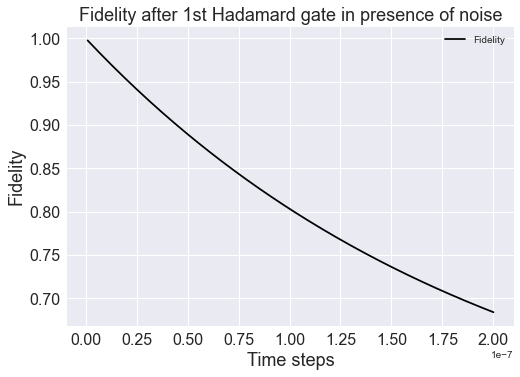

In [16]:
plt.style.use("seaborn")
plt.plot(t,F,"black",label="Fidelity")
plt.ylabel("Fidelity", fontsize=18)
plt.xlabel("Time steps", fontsize=18)
plt.tick_params(axis="both", which="major", labelsize=16)   # helps to increase the size of the values in X and Y axis
plt.tick_params(axis="both", which="minor", labelsize=16)
plt.title("Fidelity after 1st Hadamard gate in presence of noise", fontsize=18)
plt.legend()
plt.show()

In [17]:
cnot=np.array([[1,0,0,0],[0,1,0,0],[0,0,0,1],[0,0,1,0]])

In [18]:
def Decoherent_state_2( t,  T1,  T2,  density_matrix):
    
    #rho=ρ_noise
    rho=density_matrix
    
    rho=np.dot(np.dot(np.kron(cnot,I),rho),np.kron(cnot,I)) # applying 1st CNOT to qubits=[0,1]
    
    ED1,ED2,ED3=ED(t,T1,T2)
    
    Kraus_on_1_ED1=np.kron(np.kron(ED1,I),I)
    Kraus_on_1_ED2=np.kron(np.kron(ED2,I),I)
    Kraus_on_1_ED3=np.kron(np.kron(ED3,I),I)
    
    epsilon_D_rho_1=np.dot(np.dot(Kraus_on_1_ED1,rho),np.transpose(np.conj(Kraus_on_1_ED1)))+\
                    np.dot(np.dot(Kraus_on_1_ED2,rho),np.transpose(np.conj(Kraus_on_1_ED2)))+\
                    np.dot(np.dot(Kraus_on_1_ED3,rho),np.transpose(np.conj(Kraus_on_1_ED3)))
    
    # for rho1 only hadamard is applied to 1st qubit thus noise should also be applied to 1st but can be applied to qubits
    # in both the cases the result will be the same
    
    
    #epsilon_D_rho_1=np.dot(np.dot(np.kron(cnot,I),epsilon_D_rho_1),np.kron(cnot,I)) # applying 1st CNOT to qubits=[0,1]
    
    Kraus_on_2_ED1=np.kron(np.kron(I,ED1),I)
    Kraus_on_2_ED2=np.kron(np.kron(I,ED2),I)
    Kraus_on_2_ED3=np.kron(np.kron(I,ED3),I)
    
    epsilon_D_rho_2=np.dot(np.dot(Kraus_on_2_ED1,epsilon_D_rho_1),np.transpose(np.conj(Kraus_on_2_ED1)))+\
                    np.dot(np.dot(Kraus_on_2_ED2,epsilon_D_rho_1),np.transpose(np.conj(Kraus_on_2_ED2)))+\
                    np.dot(np.dot(Kraus_on_2_ED3,epsilon_D_rho_1),np.transpose(np.conj(Kraus_on_2_ED3)))
    '''
    Kraus_on_3_ED1=np.kron(np.kron(I,I),ED1)
    Kraus_on_3_ED2=np.kron(np.kron(I,I),ED2)
    Kraus_on_3_ED3=np.kron(np.kron(I,I),ED3)
    
    epsilon_D_rho_3=np.dot(np.dot(Kraus_on_3_ED1,epsilon_D_rho_2),np.transpose(np.conj(Kraus_on_3_ED1)))+\
                    np.dot(np.dot(Kraus_on_3_ED2,epsilon_D_rho_2),np.transpose(np.conj(Kraus_on_3_ED2)))+\
                    np.dot(np.dot(Kraus_on_3_ED3,epsilon_D_rho_2),np.transpose(np.conj(Kraus_on_3_ED3)))
    
    return epsilon_D_rho_3
    '''
    return epsilon_D_rho_2
    

In [19]:
ρ_noise2=[]
ρ_noise2=[Decoherent_state_2(time,T1,T2,density_matrix) for time,density_matrix in zip(t,ρ_noise)] 
len(ρ_noise2)

200

In [20]:
rho2=density_matrix(2)  # this is the pure density matrix 
F2=[]
for rho1 in ρ_noise2:
    F2.append(Fidelity(rho1,rho2))
    

C:\Users\Arunava\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


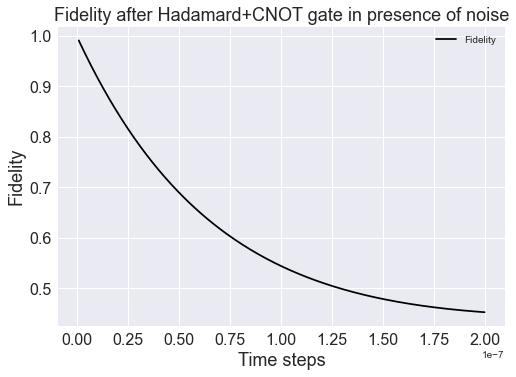

In [21]:
plt.style.use("seaborn")
plt.plot(t,F2,"black",label="Fidelity")
plt.ylabel("Fidelity", fontsize=18)
plt.xlabel("Time steps", fontsize=18)
plt.tick_params(axis="both", which="major", labelsize=16)   # helps to increase the size of the values in X and Y axis
plt.tick_params(axis="both", which="minor", labelsize=16)
plt.title("Fidelity after Hadamard+CNOT gate in presence of noise", fontsize=18)
plt.legend()
plt.show()

In [22]:
cnot_0_2=np.array([[1,0,0,0,0,0,0,0],[0,1,0,0,0,0,0,0],[0,0,1,0,0,0,0,0],[0,0,0,1,0,0,0,0],[0,0,0,0,0,1,0,0],[0,0,0,0,1,0,0,0],
                  [0,0,0,0,0,0,0,1],[0,0,0,0,0,0,1,0]])
cnot_0_2

tensor([[1, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 1, 0]], requires_grad=True)

In [23]:
def Decoherent_state_3( t,  T1,  T2,  density_matrix):
    
    #rho=ρ_noise
    rho=density_matrix
    
    rho=np.dot(np.dot(cnot_0_2,rho),cnot_0_2) # applying 1st CNOT to qubits=[0,1]

    ED1,ED2,ED3=ED(t,T1,T2)
    
    Kraus_on_1_ED1=np.kron(np.kron(ED1,I),I)
    Kraus_on_1_ED2=np.kron(np.kron(ED2,I),I)
    Kraus_on_1_ED3=np.kron(np.kron(ED3,I),I)
    
    epsilon_D_rho_1=np.dot(np.dot(Kraus_on_1_ED1,rho),np.transpose(np.conj(Kraus_on_1_ED1)))+\
                    np.dot(np.dot(Kraus_on_1_ED2,rho),np.transpose(np.conj(Kraus_on_1_ED2)))+\
                    np.dot(np.dot(Kraus_on_1_ED3,rho),np.transpose(np.conj(Kraus_on_1_ED3)))
    
    #epsilon_D_rho_1=np.dot(np.dot(np.kron(cnot,I),epsilon_D_rho_1),np.kron(cnot,I)) # applying 1st CNOT to qubits=[0,1]
    
    Kraus_on_2_ED1=np.kron(np.kron(I,ED1),I)
    Kraus_on_2_ED2=np.kron(np.kron(I,ED2),I)
    Kraus_on_2_ED3=np.kron(np.kron(I,ED3),I)
    
    epsilon_D_rho_2=np.dot(np.dot(Kraus_on_2_ED1,epsilon_D_rho_1),np.transpose(np.conj(Kraus_on_2_ED1)))+\
                    np.dot(np.dot(Kraus_on_2_ED2,epsilon_D_rho_1),np.transpose(np.conj(Kraus_on_2_ED2)))+\
                    np.dot(np.dot(Kraus_on_2_ED3,epsilon_D_rho_1),np.transpose(np.conj(Kraus_on_2_ED3)))
    
    Kraus_on_3_ED1=np.kron(np.kron(I,I),ED1)
    Kraus_on_3_ED2=np.kron(np.kron(I,I),ED2)
    Kraus_on_3_ED3=np.kron(np.kron(I,I),ED3)
    
    epsilon_D_rho_3=np.dot(np.dot(Kraus_on_3_ED1,epsilon_D_rho_2),np.transpose(np.conj(Kraus_on_3_ED1)))+\
                    np.dot(np.dot(Kraus_on_3_ED2,epsilon_D_rho_2),np.transpose(np.conj(Kraus_on_3_ED2)))+\
                    np.dot(np.dot(Kraus_on_3_ED3,epsilon_D_rho_2),np.transpose(np.conj(Kraus_on_3_ED3)))
    
    return epsilon_D_rho_3

    

In [24]:
ρ_noise3=[]
ρ_noise3=[Decoherent_state_3(time,T1,T2,density_matrix) for time,density_matrix in zip(t,ρ_noise2)] 
len(ρ_noise3)

200

In [25]:
rho2=density_matrix(3)  # this is the pure density matrix 
F3=[]
for rho1 in ρ_noise3:
    F3.append(Fidelity(rho1,rho2))
    

C:\Users\Arunava\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


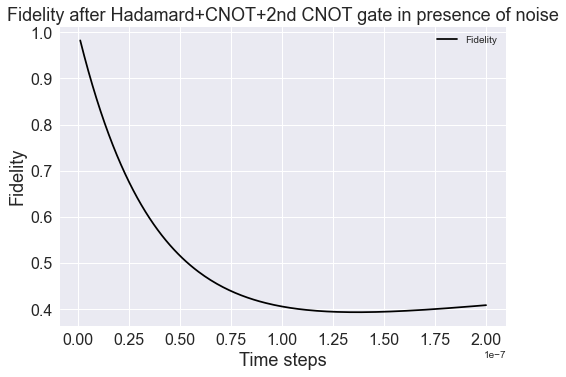

In [26]:
plt.style.use("seaborn")
plt.plot(t,F3,"black",label="Fidelity")
plt.ylabel("Fidelity", fontsize=18)
plt.xlabel("Time steps", fontsize=18)
plt.tick_params(axis="both", which="major", labelsize=16)   # helps to increase the size of the values in X and Y axis
plt.tick_params(axis="both", which="minor", labelsize=16)
plt.title("Fidelity after Hadamard+CNOT+2nd CNOT gate in presence of noise", fontsize=18)
plt.legend()
plt.show()

In [27]:
H=1/np.sqrt(2)*np.array([[1,1],[1,-1]])

In [28]:
def Decoherent_state_4( t,  T1,  T2, density_matrix):
    
    #rho=ρ_noise
    rho=density_matrix
    
    rho=np.dot(np.dot(np.kron(np.kron(H,I),I),rho),np.transpose(np.conj(np.kron(np.kron(H,I),I))))
    
    ED1,ED2,ED3=ED(t,T1,T2)
    
    Kraus_on_1_ED1=np.kron(np.kron(ED1,I),I)
    Kraus_on_1_ED2=np.kron(np.kron(ED2,I),I)
    Kraus_on_1_ED3=np.kron(np.kron(ED3,I),I)
    
    epsilon_D_rho_1=np.dot(np.dot(Kraus_on_1_ED1,rho),np.transpose(np.conj(Kraus_on_1_ED1)))+\
                    np.dot(np.dot(Kraus_on_1_ED2,rho),np.transpose(np.conj(Kraus_on_1_ED2)))+\
                    np.dot(np.dot(Kraus_on_1_ED3,rho),np.transpose(np.conj(Kraus_on_1_ED3)))
    
    # for rho1 only hadamard is applied to 1st qubit thus noise should also be applied to 1st but can be applied to qubits
    # in both the cases the result will be the same
    
    Kraus_on_2_ED1=np.kron(np.kron(I,ED1),I)
    Kraus_on_2_ED2=np.kron(np.kron(I,ED2),I)
    Kraus_on_2_ED3=np.kron(np.kron(I,ED3),I)
    
    epsilon_D_rho_2=np.dot(np.dot(Kraus_on_2_ED1,epsilon_D_rho_1),np.transpose(np.conj(Kraus_on_2_ED1)))+\
                    np.dot(np.dot(Kraus_on_2_ED2,epsilon_D_rho_1),np.transpose(np.conj(Kraus_on_2_ED2)))+\
                    np.dot(np.dot(Kraus_on_2_ED3,epsilon_D_rho_1),np.transpose(np.conj(Kraus_on_2_ED3)))
    
    Kraus_on_3_ED1=np.kron(np.kron(I,I),ED1)
    Kraus_on_3_ED2=np.kron(np.kron(I,I),ED2)
    Kraus_on_3_ED3=np.kron(np.kron(I,I),ED3)
    
    epsilon_D_rho_3=np.dot(np.dot(Kraus_on_3_ED1,epsilon_D_rho_2),np.transpose(np.conj(Kraus_on_3_ED1)))+\
                    np.dot(np.dot(Kraus_on_3_ED2,epsilon_D_rho_2),np.transpose(np.conj(Kraus_on_3_ED2)))+\
                    np.dot(np.dot(Kraus_on_3_ED3,epsilon_D_rho_2),np.transpose(np.conj(Kraus_on_3_ED3)))
    
    return epsilon_D_rho_3

In [29]:
ρ_noise4=[]
ρ_noise4=[Decoherent_state_4(time,T1,T2,density_matrix) for time,density_matrix in zip(t,ρ_noise3)] 
len(ρ_noise4)

200

In [30]:
rho2=density_matrix(4)  # this is the pure density matrix 
F4=[]
for rho1 in ρ_noise4:
    F4.append(Fidelity(rho1,rho2))
    

C:\Users\Arunava\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


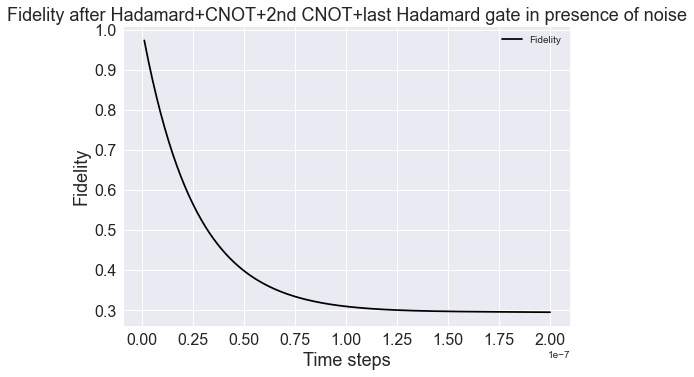

In [31]:
plt.style.use("seaborn")
plt.plot(t,F4,"black",label="Fidelity")
plt.ylabel("Fidelity", fontsize=18)
plt.xlabel("Time steps", fontsize=18)
plt.tick_params(axis="both", which="major", labelsize=16)   # helps to increase the size of the values in X and Y axis
plt.tick_params(axis="both", which="minor", labelsize=16)
plt.title("Fidelity after Hadamard+CNOT+2nd CNOT+last Hadamard gate in presence of noise", fontsize=18)
plt.legend()
plt.show()

In [32]:
from qiskit import QuantumCircuit
import qiskit.quantum_info as qi

In [33]:
for index,fidelity in enumerate(F4):
    if fidelity>0.545 and fidelity<0.555:
        print(index,"->",fidelity)

25 -> (0.5531134810877183+0j)


In [34]:
Fidelity(ρ_noise4[25],density_matrix(4))

(0.5531134810877183+0j)

In [35]:
rho_test=ρ_noise4[25]

In [36]:
rho_1 = qi.partial_trace(rho_test,[1,0])

In [37]:
rho_1

DensityMatrix([[0.53146627+0.j, 0.07778404+0.j],
               [0.07778404+0.j, 0.46853373+0.j]],
              dims=(2,))


In [39]:
'''
In the previous step: Rho = ρ = 0.53146627*|0><0| +  0.07778404*|1><1| + 0.07778404*|0><1| + 0.46853373*|1><0|

Thus success probability with noise become 0.49 if the measurement output is |1>

'''

'\nIn the previous step: Rho = ρ = 0.53146627*|0><0| +  0.07778404*|1><1| + 0.07778404*|0><1| + 0.46853373*|1><0|\n\nThus success probability with noise become 0.49 if the measurement output is |1>\n\n'

In [38]:
rho_test

tensor([[ 0.29027221+0.j,  0.        +0.j,  0.        +0.j,
          0.08280272+0.j,  0.23199344+0.j,  0.        +0.j,
          0.        +0.j, -0.07759174+0.j],
        [ 0.        +0.j,  0.03630011+0.j,  0.        +0.j,
          0.        +0.j,  0.        +0.j, -0.02621334+0.j,
          0.        +0.j,  0.        +0.j],
        [ 0.        +0.j,  0.        +0.j,  0.03630011+0.j,
          0.        +0.j,  0.        +0.j,  0.        +0.j,
         -0.00624963+0.j,  0.        +0.j],
        [ 0.08280272+0.j,  0.        +0.j,  0.        +0.j,
          0.16859385+0.j,  0.07759174+0.j,  0.        +0.j,
          0.        +0.j, -0.12174642+0.j],
        [ 0.23199344+0.j,  0.        +0.j,  0.        +0.j,
          0.07759174+0.j,  0.25590019+0.j,  0.        +0.j,
          0.        +0.j, -0.08280272+0.j],
        [ 0.        +0.j, -0.02621334+0.j,  0.        +0.j,
          0.        +0.j,  0.        +0.j,  0.0320017 +0.j,
          0.        +0.j,  0.        +0.j],
        [ 0.    